<a href="https://colab.research.google.com/github/Juancbr99/Entrenamiento-de-modelo-/blob/main/Transferencia_de_Aprendizaje_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Transferencia de Aprendizaje / Transfers Learning

In [ ]:
#Crear nuestro propio conjunto de datos  /content/lirios/lirios.zip  /content/orquideas/orquideas.zip

In [ ]:
!unzip lirios.zip -d lirios

Archive:  lirios.zip
   creating: lirios/lirios/
  inflating: lirios/lirios/20200411_124153.jpg  
  inflating: lirios/lirios/asian-lily-830890_960_720.jpg  
  inflating: lirios/lirios/BOUQUET-DE-LIRIOS.jpg  
  inflating: lirios/lirios/bouquetdeliriosjaponesesqueenoflightregalosnamastecolombia.jpg  
  inflating: lirios/lirios/bucaro-de-lirios.jpg  
  inflating: lirios/lirios/cuadro-lirios-tcfl0017.jpg  
  inflating: lirios/lirios/image.jpeg  
  inflating: lirios/lirios/image11.jpeg  
  inflating: lirios/lirios/image13.jpeg  
  inflating: lirios/lirios/image16.jpeg  
  inflating: lirios/lirios/image17.jpeg  
  inflating: lirios/lirios/image18.jpeg  
  inflating: lirios/lirios/image20.jpeg  
  inflating: lirios/lirios/image21.jpeg  
  inflating: lirios/lirios/image22.jpeg  
  inflating: lirios/lirios/image23.jpeg  
  inflating: lirios/lirios/image25.jpeg  
  inflating: lirios/lirios/image26.jpeg  
  inflating: lirios/lirios/image3.jpeg  
  inflating: lirios/lirios/image33.jpeg  
  inflati

In [ ]:
!unzip -FF orquideas.zip -d orquideas

Archive:  orquideas.zip
   creating: orquideas/orquideas/
  inflating: orquideas/orquideas/06-orquideas.jpg  
  inflating: orquideas/orquideas/10-1.jpg  
  inflating: orquideas/orquideas/10628455_358341847657302_6438833005091657512_n.jpg  
  inflating: orquideas/orquideas/16851097983960.jpg  
  inflating: orquideas/orquideas/17017030458776.jpg  
  inflating: orquideas/orquideas/1b5b4f156f3a-orquideas2-t.jpg  
  inflating: orquideas/orquideas/220104-oncidium-sphacelatum-203x300.jpg  
  inflating: orquideas/orquideas/229.jpg.webp  
  inflating: orquideas/orquideas/4de8a3b37536-apertura-dobestock694686054.jpg  
  inflating: orquideas/orquideas/500_333.jpeg  
  inflating: orquideas/orquideas/500_3332.jpeg  
  inflating: orquideas/orquideas/5984938dce371.jpeg  
  inflating: orquideas/orquideas/71Fd1X11L2L._AC_SL1500_.jpg  
  inflating: orquideas/orquideas/82868.jpg  
  inflating: orquideas/orquideas/82872.jpg  
  inflating: orquideas/orquideas/82876.jpg  
  inflating: orquideas/orquideas/94

In [ ]:
# Instalar 7-Zip en Colab
#!apt-get install -y p7zip-full

In [ ]:
#!7z x orquideas/orquideas.zip -o/orquideas

In [ ]:
!rm -rf lirios.zip
!rm -rf orquideas.zip

In [ ]:
#Crear un set de datos (ya no es en memoria)

!mkdir dataset
!cp -r lirios dataset/lirios
!cp -r orquideas dataset/orquideas

In [ ]:
#Aumento de Datos
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#Crear el dataset generador
datagen = ImageDataGenerator(
    rescale = 1./255,  #Normalizar imgenes
    rotation_range = 10,   #Transformacion de Imagenes
    width_shift_range = 0.15,
    height_shift_range = 0.15,
    shear_range = 5,
    zoom_range = [0.7, 1.3],
    validation_split = 0.2  #Tomar el 20% de imagenes para pruebas
)

data_gen_entrenamiento = datagen.flow_from_directory("/content/dataset",
                                                     target_size=(224,224),
                                                     batch_size=32, shuffle=True,
                                                     subset="training")

data_gen_pruebas = datagen.flow_from_directory("/content/dataset",
                                                     target_size=(224,224),
                                                     batch_size=32, shuffle=True,
                                                     subset="validation")


Found 797 images belonging to 2 classes.
Found 199 images belonging to 2 classes.


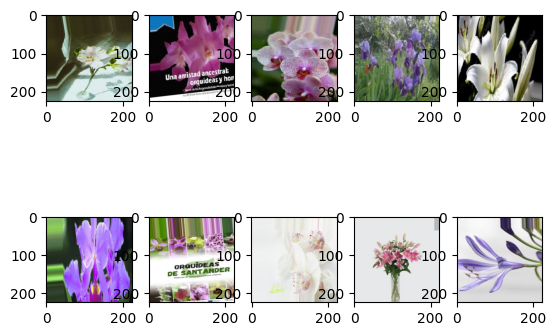

In [ ]:
import matplotlib.pyplot as plt

for imagenes, etiquetas in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(imagenes[i])

  break
plt.show()

In [ ]:
etiquetas

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

url = "https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/tf2-preview-feature-vector/4"

mobilenetv2 = hub.KerasLayer(url, input_shape=(224,224,3))   #el 3 es porque las imagenes están a color

In [ ]:
#CONGELAR LAS CAPAS
mobilenetv2.trainable = False

In [ ]:
# Cargar MobileNetV2 sin la capa superior (OJO) y especificando el tamaño de entrada
mobilenetv2 = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                                include_top=False,
                                                pooling='avg')  # podriamos usar este 'avg' para un promedio global

# Congelar las capas de MobileNetV2 para no entrenarlas
mobilenetv2.trainable = False

# Crear el modelo secuencial
modelo = tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.Dense(2, activation="softmax")
])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
modelo.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

In [ ]:
EPOCAS = 50
entrenamiento = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data = data_gen_pruebas
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.6197 - loss: 0.7701 - val_accuracy: 0.7789 - val_loss: 0.4393
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 47s 389ms/step - accuracy: 0.8152 - loss: 0.4121 - val_accuracy: 0.8442 - val_loss: 0.3606
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 403ms/step - accuracy: 0.8423 - loss: 0.3469 - val_accuracy: 0.8543 - val_loss: 0.3163
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 440ms/step - accuracy: 0.8892 - loss: 0.3049 - val_accuracy: 0.8492 - val_loss: 0.3424
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 443ms/step - accuracy: 0.8823 - loss: 0.2920 - val_accuracy: 0.8794 - val_loss: 0.3121
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 440ms/step - accuracy: 0.8892 - loss: 0.2897 - val_accuracy: 0.8693 - val_loss: 0.2993
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 439ms/step - accuracy: 0.8886 - loss: 0.2920 - val_accuracy: 0.8744 - val_loss: 0.2581
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 431ms/step - accuracy: 0.9034 - loss: 0.2544 - val_accuracy: 0.8844 -

In [ ]:
from PIL import Image
import cv2

def categorizar(ruta):
  img = Image.open(ruta)
  img = img.convert("RGB")
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224,224))
  prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))
  return np.argmax(prediccion[0], axis=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Lirio


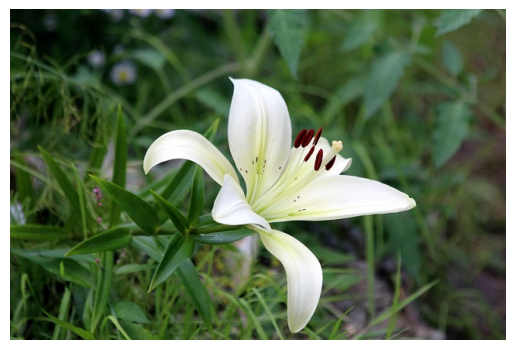

In [ ]:
ruta = "lirio.jpg"
prediccion = categorizar(ruta)
if prediccion == 0:
        print("Lirio")
else: print("Orquidea")

 # Mostrar la imagen procesada
img = Image.open(ruta)
plt.imshow(img)
plt.axis('off')  # Ocultar los ejes
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Orquidea


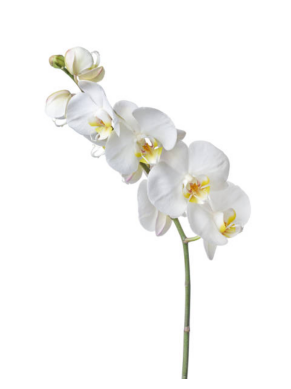

In [ ]:
ruta = "orquidea.jpg"
prediccion = categorizar(ruta)
if prediccion == 0:
        print("Lirio")
else: print("Orquidea")
 # Mostrar la imagen procesada
img = Image.open(ruta)
plt.imshow(img)
plt.axis('off')  # Ocultar los ejes
plt.show()